In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [44]:
def localweight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    
    w=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    
    return w

### before predicting we initialise the value to zero(ypred)
 #### where m-shape of 1st column,n-share of 2nd column,

In [57]:
def localweightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m) 
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

In [58]:
data=pd.read_csv('D:/7th sem/ML/seaborn-data-master/seaborn-data-master/tips.csv')

In [59]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [60]:
colA=np.array(data.total_bill)
colB=np.array(data.tip)

In [61]:
mcolA=np.mat(colA)
mcolB=np.mat(colB)

In [62]:
m=np.shape(mcolB)[1]

In [63]:
m

244

### np.ones:Takes the parameter as data and prints it as ones 

In [64]:
one=np.ones((1,m),dtype=int)

In [65]:
one.shape

(1, 244)

### hstack:

In [66]:
X=np.hstack((one.T,mcolA.T))
print(X.shape)

(244, 2)


In [67]:
X

matrix([[ 1.  , 16.99],
        [ 1.  , 10.34],
        [ 1.  , 21.01],
        [ 1.  , 23.68],
        [ 1.  , 24.59],
        [ 1.  , 25.29],
        [ 1.  ,  8.77],
        [ 1.  , 26.88],
        [ 1.  , 15.04],
        [ 1.  , 14.78],
        [ 1.  , 10.27],
        [ 1.  , 35.26],
        [ 1.  , 15.42],
        [ 1.  , 18.43],
        [ 1.  , 14.83],
        [ 1.  , 21.58],
        [ 1.  , 10.33],
        [ 1.  , 16.29],
        [ 1.  , 16.97],
        [ 1.  , 20.65],
        [ 1.  , 17.92],
        [ 1.  , 20.29],
        [ 1.  , 15.77],
        [ 1.  , 39.42],
        [ 1.  , 19.82],
        [ 1.  , 17.81],
        [ 1.  , 13.37],
        [ 1.  , 12.69],
        [ 1.  , 21.7 ],
        [ 1.  , 19.65],
        [ 1.  ,  9.55],
        [ 1.  , 18.35],
        [ 1.  , 15.06],
        [ 1.  , 20.69],
        [ 1.  , 17.78],
        [ 1.  , 24.06],
        [ 1.  , 16.31],
        [ 1.  , 16.93],
        [ 1.  , 18.69],
        [ 1.  , 31.27],
        [ 1.  , 16.04],
        [ 1.  , 

### Docstring:a.argsort(axis=-1, kind=None, order=None) and Returns the indices that would sort this array. and 0.5 is a k value we can choose any

In [68]:
ypred=localweightRegression(X,mcolB,0.5)

In [69]:
ypred

array([ 2.89600072,  1.79792676,  3.4522923 ,  3.52469879,  3.55735533,
        4.30366513,  1.74542033,  3.3728316 ,  2.44785581,  2.48880782,
        1.8083104 ,  4.79767983,  2.4062242 ,  2.96892092,  2.48153633,
        3.60296925,  1.79915825,  2.69663122,  2.89434019,  3.31271154,
        2.99001488,  3.16455055,  2.45092913,  5.81565108,  3.01841158,
        2.97028536,  2.25892138,  2.0276448 ,  3.60793899,  2.97252695,
        1.95484881,  2.99194322,  2.44464168,  3.32920123,  2.96499951,
        3.21755765,  2.7072132 ,  2.89066608,  2.88520305,  4.24629839,
        2.56138533,  2.92431206,  2.4541946 ,  1.95650777,  3.76134349,
        3.00455741,  3.53901817,  4.09179973,  3.66290968,  3.00808646,
        2.0045738 ,  1.80493014,  4.74741353,  1.89792722,  4.27129464,
        2.93423809,  3.43543432,  3.4808215 ,  1.94126954,  7.23057352,
        3.16455055,  2.41735695,  1.88491665,  3.00455741,  2.93692617,
        3.09292596,  2.77475539,  1.        ,  3.14256163,  2.45

In [70]:
#ypred=localweightRegression(X,mcolB,0.5)
sortIndex=X[:,1].argsort(0)
#xsort=X[sortIndex][:,0]
#fig=plt.figure()
#ax=fig.add_subplot(1,1,1)
#ax.scatter(colA,colB,color='green')
#ax.plot()

In [71]:
sortIndex

matrix([[ 67],
        [ 92],
        [111],
        [172],
        [149],
        [195],
        [218],
        [145],
        [135],
        [126],
        [222],
        [  6],
        [ 30],
        [178],
        [ 43],
        [148],
        [ 53],
        [235],
        [ 82],
        [226],
        [ 10],
        [ 51],
        [ 16],
        [136],
        [  1],
        [196],
        [ 75],
        [168],
        [169],
        [117],
        [233],
        [ 62],
        [132],
        [ 58],
        [100],
        [128],
        [217],
        [232],
        [120],
        [147],
        [ 70],
        [ 97],
        [220],
        [133],
        [118],
        [ 99],
        [124],
        [ 50],
        [236],
        [161],
        [ 27],
        [201],
        [209],
        [215],
        [198],
        [202],
        [ 86],
        [151],
        [139],
        [213],
        [228],
        [ 26],
        [158],
        [121],
        [224],
        [221],
        [1

In [72]:
#ypred=localweightRegression(X,mcolB,0.5)
#sortIndex=X[:,1].argsort(0)
xsort=X[sortIndex][:,0]
#fig=plt.figure()
#ax=fig.add_subplot(1,1,1)
#ax.scatter(colA,colB,color='green')
#ax.plot()

In [73]:
xsort

matrix([[ 1.  ,  3.07],
        [ 1.  ,  5.75],
        [ 1.  ,  7.25],
        [ 1.  ,  7.25],
        [ 1.  ,  7.51],
        [ 1.  ,  7.56],
        [ 1.  ,  7.74],
        [ 1.  ,  8.35],
        [ 1.  ,  8.51],
        [ 1.  ,  8.52],
        [ 1.  ,  8.58],
        [ 1.  ,  8.77],
        [ 1.  ,  9.55],
        [ 1.  ,  9.6 ],
        [ 1.  ,  9.68],
        [ 1.  ,  9.78],
        [ 1.  ,  9.94],
        [ 1.  , 10.07],
        [ 1.  , 10.07],
        [ 1.  , 10.09],
        [ 1.  , 10.27],
        [ 1.  , 10.29],
        [ 1.  , 10.33],
        [ 1.  , 10.33],
        [ 1.  , 10.34],
        [ 1.  , 10.34],
        [ 1.  , 10.51],
        [ 1.  , 10.59],
        [ 1.  , 10.63],
        [ 1.  , 10.65],
        [ 1.  , 10.77],
        [ 1.  , 11.02],
        [ 1.  , 11.17],
        [ 1.  , 11.24],
        [ 1.  , 11.35],
        [ 1.  , 11.38],
        [ 1.  , 11.59],
        [ 1.  , 11.61],
        [ 1.  , 11.69],
        [ 1.  , 11.87],
        [ 1.  , 12.02],
        [ 1.  , 

In [74]:
#ypred=localweightRegression(X,mcolB,0.5)
#sortIndex=X[:,1].argsort(0)
#xsort=X[sortIndex][:,0]
fig=plt.figure()
#ax=fig.add_subplot(1,1,1)
#ax.scatter(colA,colB,color='green')
#ax.plot()

<Figure size 432x288 with 0 Axes>

In [75]:
ax=fig.add_subplot(1,1,1)

In [76]:
ax.scatter(colA,colB,color='green')

In [78]:
ax.plot(xsort[:,1],ypred[sortIndex],color='red',linewidth=5)

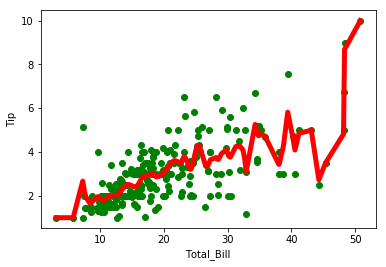

In [81]:
ypred=localweightRegression(X,mcolB,0.5)
sortIndex=X[:,1].argsort(0)
xsort=X[sortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(colA,colB,color='green')
ax.plot(xsort[:,1],ypred[sortIndex],color='red',linewidth=5)
plt.xlabel('Total_Bill')
plt.ylabel('Tip')
plt.show()